In [1]:
import pandas as pd

### pandas로 dataframe형태 데이터 가져오기

In [25]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

### 나이와 요금 그룹핑 시켜서 돌려보기

In [32]:
train['Age'].fillna(0, inplace = True)
agelist = []
for row in train['Age']:
    row = int(row/10)
    agelist.append(row)
    
train['NewAge'] = agelist
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [38]:
farelist = []
for row in train['Fare']:
    row = int(row/10)
    farelist.append(row)
    
train['NewFare'] = farelist
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,5,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,3


### matplotlib을 활용해서 상관관계 파악하기 2

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
sns.set()

### 전체 인원에 따른 사망자 비율을 고려해본 결과이다

In [109]:
def compare(feature):
    # train[train['Survived'] == 0][feature].value_counts()
    # -> train.astype('category')[train['Survived'] == 0]['NewAge'].value_counts()
    # 위의 변환을 거치며 0개인 경우의 카테고리도 카운팅된다.
    # 이걸 진행한 이유는 단지 사망자수가 아닌 기존의 총 인원 수 중에 사망 비율을 확인해보기 위해서이다.
    survived = train.astype('category')[train['Survived'] == 0][feature].value_counts()
    dead = train.astype('category')[train['Survived'] == 1][feature].value_counts()
    
    total = survived + dead
    SofT = survived/total # Survived of total
    DofT = dead/total # Dead of total

    # 절대적인 인원 수 측정 데이터프레임
    newdf = pd.DataFrame([survived, dead])
    newdf.index = (['survived', 'dead'])
    
    # 상대적인 인원 수(비율) 측정 데이터프레임
    ratedf = pd.DataFrame([SofT, DofT])
    ratedf.index = (['SofT', 'DofT'])

    newdf.plot(kind = 'bar', stacked = True, figsize = (10,5), title = feature)
    ratedf.plot(kind = 'bar', stacked = True, figsize = (10,5), title = feature)

In [111]:
collist = list(train.columns)
collist = [collist[idx] for idx in range(len(collist)) if idx not in [0,1,3,5,8,9,10]]
collist

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'NewAge', 'NewFare']

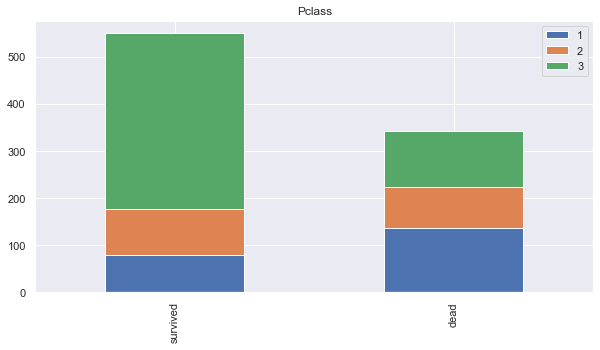

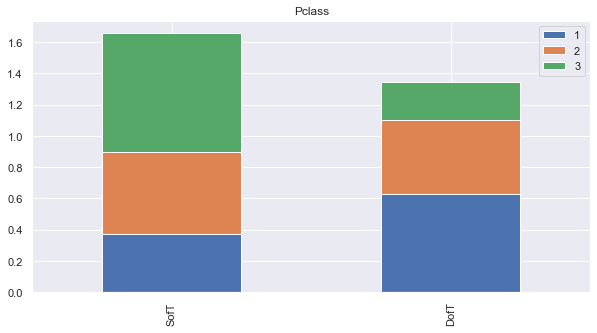

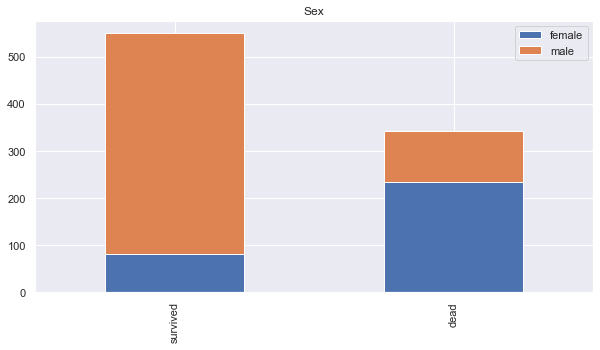

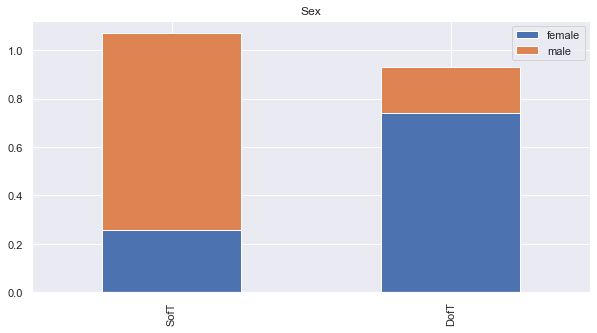

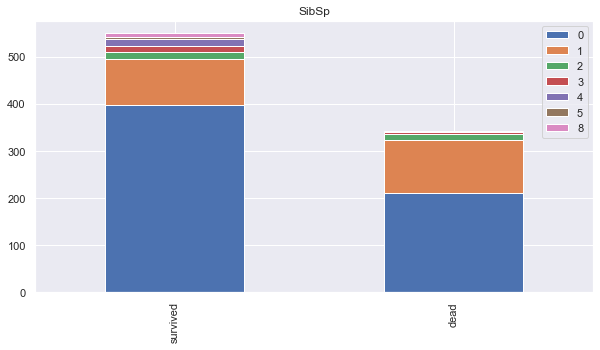

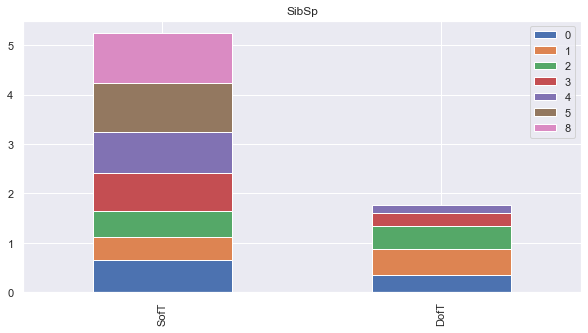

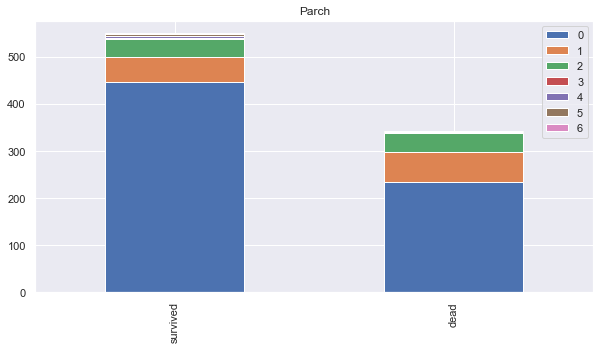

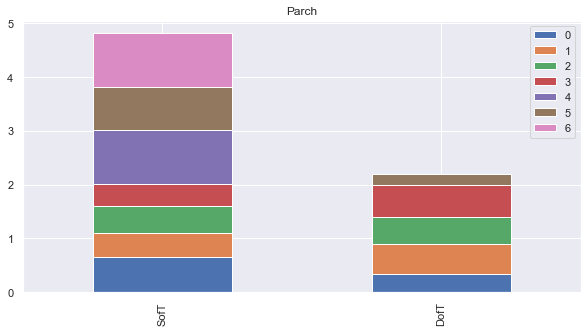

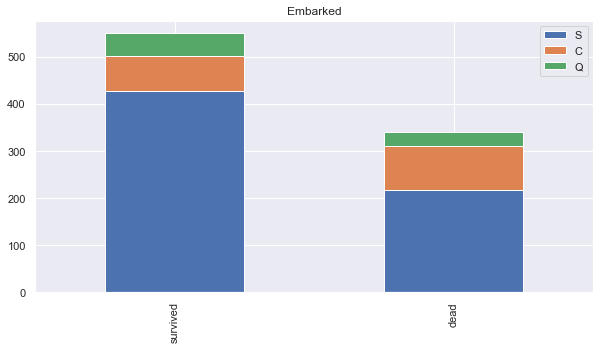

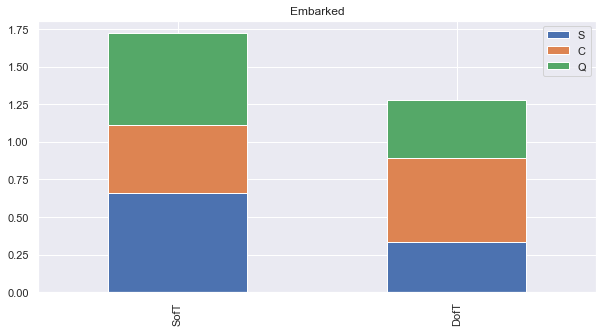

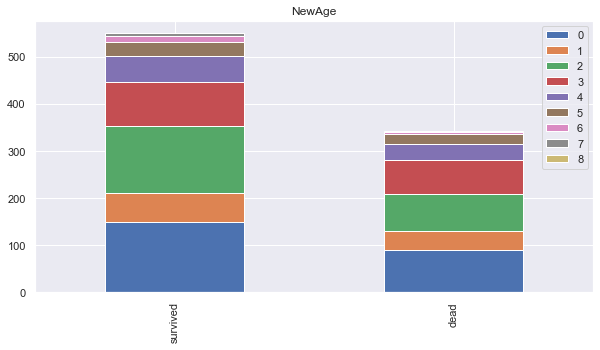

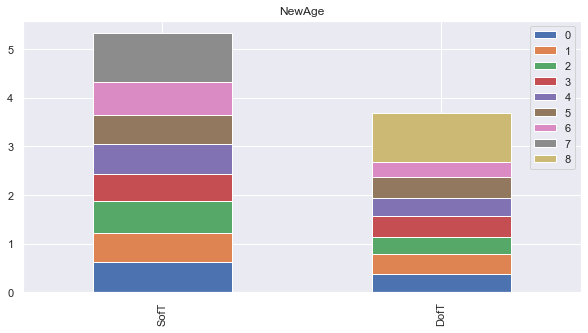

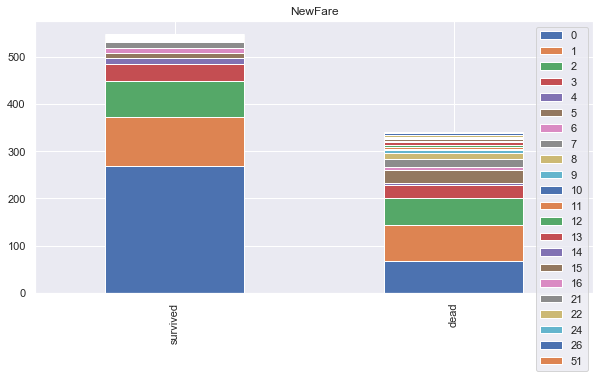

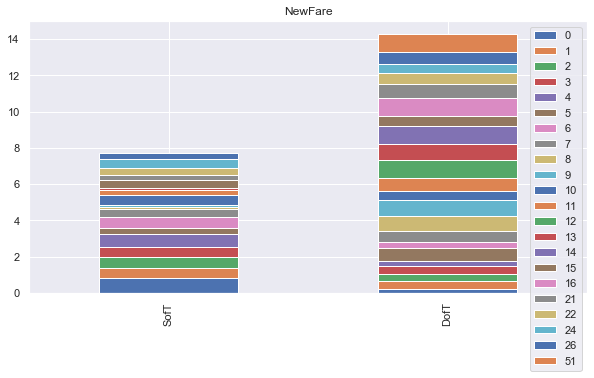

In [112]:
for ls in collist:
    compare(ls)